In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

import seaborn as sns

In [1]:
df = pd.read_csv("../output/data/structural_split_train_with_embeddings.csv")
df.head()   

,entry,protein2,uniprot_description,rank,protein1,protein_name,function,GPT_description,all_description,protein1_embedding,protein2_embedding,cosine_similarity
0,B2GUB3-K139E,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Decreased monoglycylation activity.,NaN,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Tubulin tyrosine ligase 3,Monoglycylase which modifies alpha- and beta-t...,The site specificity of TTLL enzymes and their...,Decreased monoglycylation activity. The site s...,[-6.76873000e-03 -1.69605672e-01 8.15060213e-...,[-4.62564733e-03 -1.68973312e-01 8.07426050e-...,0.999991
1,Q9V3Z1-K266R,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,No effect on mitosis. Embryos display an early...,NaN,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,Tribbles,Adapter protein that negatively regulates diff...,NaN,No effect on mitosis. Embryos display an early...,[ 2.27191467e-02 -1.51268065e-01 1.16504923e-...,[ 2.34031882e-02 -1.52165294e-01 1.14847869e-...,0.999988
2,Q16643-G10R,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,NaN,-1.0,MAGVSFSGHGLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,Drebrin,Actin cytoskeleton-organizing protein that pla...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,[-5.61641455e-02 -7.30362087e-02 1.50626265e-...,[-5.74310161e-02 -7.24767596e-02 1.40832532e-...,0.999980
3,P08622-A44E,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAEAK...,NaN,-1.0,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAAAK...,Chaperone protein DnaJ,Interacts with DnaK and GrpE to disassemble a ...,Enhances effect. The mutation in the DnaJ prot...,Enhances effect. The mutation in the DnaJ prot...,[-2.08028138e-01 3.62938307e-02 6.93338811e-...,[-2.07400307e-01 3.94168682e-02 7.27231428e-...,0.999959
4,Q0D2I5-A487R,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Loss of interaction with XRCC4; when associate...,NaN,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Non-homologous end joining factor IFFO1,Nuclear matrix protein involved in the immobil...,NaN,Loss of interaction with XRCC4; when associate...,[-3.52694727e-02 -1.46516681e-01 -6.48949854e-...,[-4.08831239e-02 -1.49988025e-01 -5.50699839e-...,0.999946


In [2]:
df.columns

Index(['entry', 'protein2', 'uniprot_description', 'rank', 'protein1',
       'protein_name', 'function', 'GPT_description', 'all_description',
       'protein1_embedding', 'protein2_embedding', 'cosine_similarity'],
      dtype='object')

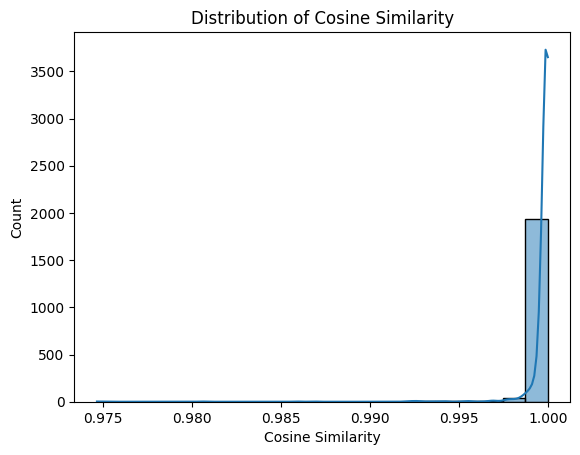

In [19]:
sns.histplot(df["cosine_similarity"], bins=20, kde=True)
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.show()
    

In [16]:
df.dtypes

entry                   object
protein2                object
uniprot_description     object
rank                   float64
protein1                object
protein_name            object
function                object
GPT_description         object
all_description         object
protein1_embedding      object
protein2_embedding      object
cosine_similarity      float64
dtype: object

In [19]:
def to_float_array(x):
    if isinstance(x, str):
        return np.fromstring(x.strip("[]"), sep=" ", dtype=float)
    return np.array(x, dtype=float)


df["protein1_embedding"] = df["protein1_embedding"].apply(to_float_array)
df["protein2_embedding"] = df["protein2_embedding"].apply(to_float_array)

In [35]:
df.iloc[0, 9].shape

(320,)

In [84]:
# Step 1: Combine both sets of embeddings row-wise
protein1_embs = np.vstack(df["protein1_embedding"])
protein2_embs = np.vstack(df["protein2_embedding"])

# Step 2: Stack all embeddings vertically
all_embeddings = np.vstack([protein1_embs, protein2_embs])

In [85]:
# Stack protein1 and protein2 embeddings horizontally per row
combined_embeddings = np.hstack([protein1_embs, protein2_embs])  # shape: (2000, 640)

# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(combined_embeddings)  # shape: (2000, 2)


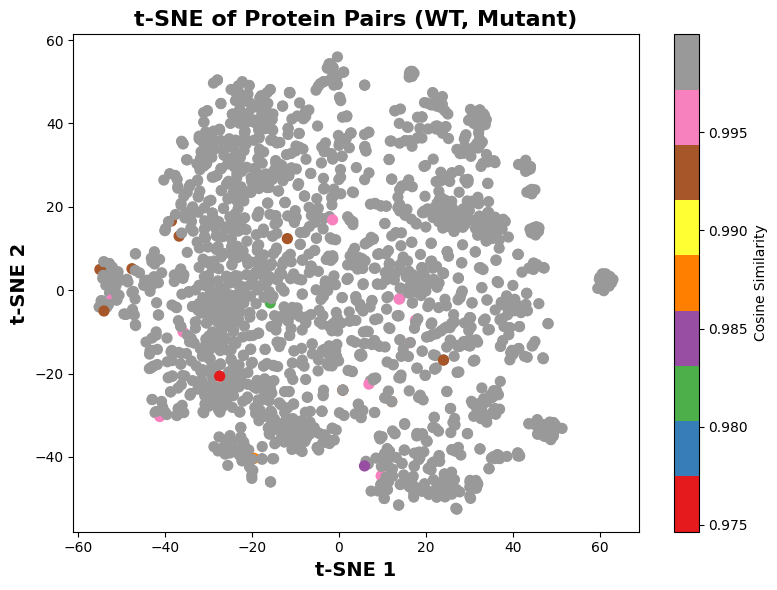

In [86]:
fig = plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_coords[:, 0],
    tsne_coords[:, 1],
    c=df["cosine_similarity"],
    cmap="Set1",
    s=50
)
plt.colorbar(scatter, label="Cosine Similarity")
plt.title("t-SNE of Protein Pairs (WT, Mutant)",fontsize=16, weight='bold')
plt.xlabel("t-SNE 1", fontsize=14, weight='bold')
plt.ylabel("t-SNE 2", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
fig.savefig("../output/figure/2000_tsne_wt_mutant_cos.tiff", dpi=300)
plt.close()


In [7]:
# Embed each protein individually
protein1_embeddings = []
protein2_embeddings = []

for _, row in df.iterrows():
    try:
        emb1 = row["protein1_embedding"]
        emb2 = row["protein2_embedding"]
        protein1_embeddings.append(emb1)
        protein2_embeddings.append(emb2)
    except Exception as e:
        print("Embedding error:", e)

# Stack all embeddings (wild-type first, then mutant)
all_embeddings = np.vstack([protein1_embeddings, protein2_embeddings])


In [73]:
# Run t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_coords = tsne.fit_transform(all_embeddings)

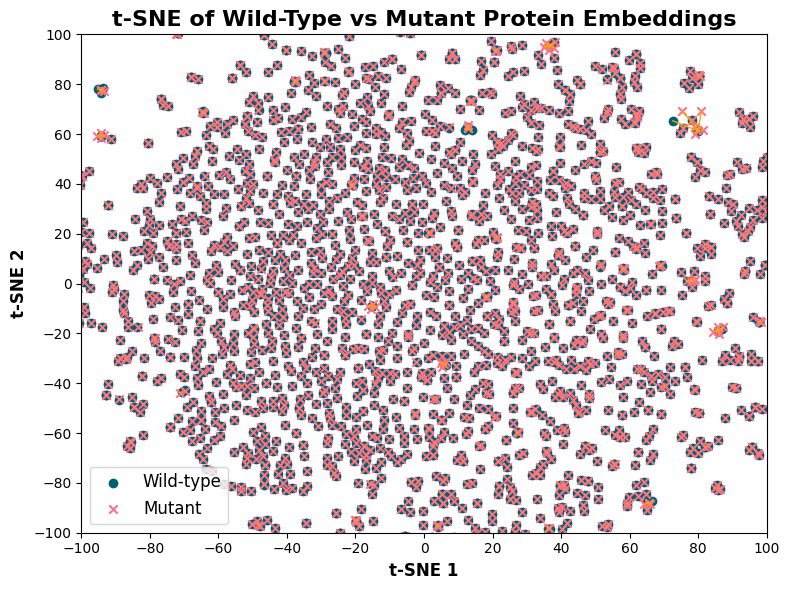

In [77]:

# Separate back into wild-type and mutant coords
n = len(protein1_embeddings)
pt1_coords = tsne_coords[:n]
pt2_coords = tsne_coords[n:]

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("t-SNE of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xticks(np.arange(-100, 101, 20))
plt.yticks(np.arange(-100, 101, 20))

plt.xlabel("t-SNE 1", fontsize=12, fontweight='bold')
plt.ylabel("t-SNE 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Save as high-quality figure
fig.savefig("../output/figure/2000_tsne_wt_mutant.tiff", dpi=300)
plt.close()

In [11]:
umap_coords = UMAP(n_components=2, random_state=42).fit_transform(all_embeddings)


ValueError: could not convert string to float: '[-6.76873000e-03 -1.69605672e-01  8.15060213e-02  8.80193561e-02\n  7.21707493e-02 -1.88833207e-01 -1.23141475e-01 -1.12266257e-01\n -1.23121686e-01 -1.06349334e-01  4.54605259e-02  2.17696324e-01\n -8.91563818e-02  1.62974462e-01  8.91069025e-02 -1.72439709e-01\n  1.31941944e-01 -4.24431376e-02 -1.53979259e-02  7.45368078e-02\n -1.31546438e-01  1.39756009e-01  2.69421916e-02 -8.85148346e-02\n  9.98663995e-03  2.20959693e-01 -1.97509304e-02  4.44023497e-03\n  4.23106505e-03  9.87237543e-02 -8.73258635e-02  7.20843226e-02\n  1.13785729e-01 -1.55372307e-01  3.47777978e-02 -1.51623338e-01\n  1.57704484e-02  1.75662972e-02  1.16990574e-01  8.98787975e-02\n  6.41029179e-02  1.33469343e-01 -3.45467590e-02  5.10168262e-02\n -5.45348562e-02  1.26785152e-02 -1.13217437e+00  1.10691622e-01\n -1.78063393e-01 -5.15184999e-02  1.58059280e-02 -6.32265359e-02\n -3.23137082e-02  1.23601116e-01 -5.69747724e-02 -1.20017186e-01\n  2.29890332e-01  2.37044431e-02  3.06551069e-01 -2.95470450e-02\n -1.20803833e-01 -8.12544376e-02 -4.69511366e+00 -1.41468927e-01\n -5.55408448e-02 -1.14258118e-01  6.94922656e-02  2.10284293e-01\n -1.59718432e-02  4.34973799e-02 -1.47651702e-01  7.29674622e-02\n -7.43617415e-02  2.44546041e-01 -1.14333048e-01  9.83473361e-02\n  5.90075254e-02  4.93279919e-02  4.10323311e-03  7.07996935e-02\n  7.18871877e-02  1.67212754e-01  3.14342603e-02 -9.45889764e-03\n -2.35314667e-03 -1.19100213e-01  1.36303887e-01 -9.71804857e-02\n -1.15901576e-02  1.85358077e-01 -9.16624963e-02 -4.05902527e-02\n  4.70525399e-02  1.34970009e-01 -4.00609449e-02  1.28377140e-01\n -2.18722448e-02  1.28538877e-01 -7.90303871e-02  2.53523840e-03\n  2.03948513e-01 -5.21376170e-02 -1.71946362e-02  1.37497559e-01\n  4.96351756e-02  1.22455865e-01 -1.49313673e-01 -4.83397394e-02\n -6.60480112e-02 -1.01631358e-01  4.72564064e-02  1.82929307e-01\n  8.38651806e-02  2.02578232e-02  1.74400792e-01  7.28121400e-02\n  1.55537939e-02  2.76980907e-01 -1.60473421e-01  1.85086519e-01\n  2.93113459e-02  1.04843073e-01  1.75147668e-01 -7.30658742e-03\n  1.51132405e-01 -9.50439498e-02 -2.16810778e-02 -1.44504264e-01\n -1.23503253e-01  4.02220562e-02  8.48922133e-03 -7.74265230e-02\n -2.30183199e-01  6.19029999e-02  1.28508076e-01  1.69384927e-02\n -1.27403945e-01 -8.29677954e-02 -1.83486834e-01 -1.41419262e-01\n  8.28831196e-02 -1.23035513e-01  7.13439062e-02  9.36999023e-02\n -2.02455651e-02  1.26612280e-02 -1.45915216e-02  1.43191710e-01\n -1.80854619e-01  2.42381781e-01  7.02296793e-02 -1.08320750e-01\n -3.03277045e-01 -2.17978254e-01 -9.85751674e-02  6.11383505e-02\n  6.73407614e-02  1.08979598e-01 -5.57855330e-02  1.10230595e-01\n -2.76686642e-02 -1.95511073e-01 -1.06327266e-01  2.21278258e-02\n -8.15052316e-02 -6.16502166e-02  4.64405753e-02 -1.71858877e-01\n -2.09322665e-02 -3.32019478e-02  1.38158679e-01  9.73251164e-02\n  1.92925364e-01 -9.15427692e-03 -3.69488522e-02  1.01906270e-01\n  1.28970638e-01 -1.64873421e-01 -7.08753318e-02 -1.15588419e-01\n  1.88190788e-01 -1.75373629e-01 -5.92007004e-02 -7.22142011e-02\n -2.48487368e-02  2.28172634e-02 -2.10943207e-01  1.40917271e-01\n -3.09492219e-02 -1.76914871e-01 -4.00165506e-02  3.05984430e-02\n  5.15324235e-01  1.33249223e-01  4.35484983e-02  1.14951484e-01\n -1.79114088e-01  2.06502229e-01  1.52116507e-01  2.74070233e-01\n -4.92575429e-02  1.44220695e-01  1.23259068e-01  7.08117187e-02\n  2.11456940e-02  1.37422591e-01 -4.78869304e-02 -3.29630524e-02\n -8.07568878e-02  1.01043828e-01 -6.55711666e-02 -1.13496065e-01\n -1.83568150e-01  1.26279920e-01  3.63322906e-02  2.70843431e-02\n -8.36450383e-02 -7.98629671e-02 -1.50768831e-03 -9.34231803e-02\n -2.70899802e-01 -7.10047483e-02  1.61494493e-01 -1.04988236e-02\n  2.02912420e-01 -1.26453498e-02 -8.03508013e-02  3.46660316e-02\n  2.53232028e-02  9.80059803e-02 -1.27574913e-02  1.05676122e-01\n  1.62255555e-01 -4.37420420e-02  9.33246762e-02  2.21668482e-02\n  1.77372769e-02 -1.88974384e-02 -7.39926379e-03 -1.76703706e-02\n  1.70404278e-02 -1.66359559e-01 -2.95408387e-02  3.73138720e-03\n  8.63639489e-02  1.78325782e-03  2.20233470e-01  1.54549867e-01\n  3.69628184e-02  5.60390353e-02 -1.53832555e-01  6.53136447e-02\n -8.99076834e-02 -1.15530044e-01 -6.23826720e-02  1.90825760e-02\n  2.00552773e-02 -5.32269739e-02  1.81748539e-01  1.20993902e-03\n -7.78966844e-02 -4.95637059e-02 -7.31493533e-02 -1.82416707e-01\n  4.22066636e-02  2.05061436e-01 -5.14821038e-02 -1.31390318e-01\n  1.91519365e-01  4.41713892e-02  3.84774357e-02  2.52009034e-02\n -1.30138239e-02  6.44387156e-02  1.88803095e-02 -9.65145323e-03\n  1.66868508e-01  5.36398329e-02  7.68393800e-02 -4.78673987e-02\n -8.23512450e-02 -4.40548286e-02  3.19836169e-01 -3.30646113e-02\n  8.95607322e-02  2.31436953e-01 -7.11179674e-02 -7.26614669e-02\n -1.07436433e-01 -1.84609339e-01 -1.08812854e-01 -4.36566621e-02\n  1.27613202e-01  2.82173920e-02 -1.45399962e-02 -1.53914308e-02\n -1.59453243e-01 -3.38955075e-02 -3.33805203e-01  1.14863113e-01\n -4.42609936e-02 -6.07029125e-02  6.55656820e-03  9.46496576e-02\n -5.38129471e-02 -1.24118805e-01 -1.12385422e-01 -2.93217674e-02\n  2.34221593e-02 -4.79079038e-02  2.19713561e-02 -6.19390383e-02\n -2.36097947e-02  9.38759670e-02  2.21824739e-02 -3.40576284e-02\n -9.37682018e-02  1.32062122e-01  4.69364487e-02 -4.16013040e-02]'

In [ ]:
# Separate back into wild-type and mutant coords
n = len(protein1_embeddings)
pt1_coords = umap_coords[:n]
pt2_coords = umap_coords[n:]

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("UMAP of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(0, 15)
plt.ylim(0, 15)
#plt.xticks(np.arange(-60, 61, 10))
#plt.yticks(np.arange(-50, 51, 10))

plt.xlabel("UMAP 1", fontsize=12, fontweight='bold')
plt.ylabel("UMAP 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("../output/figure/2000_umap_wt_mutant.tiff", dpi=300)
plt.close()


NameError: name 'umap_coords' is not defined

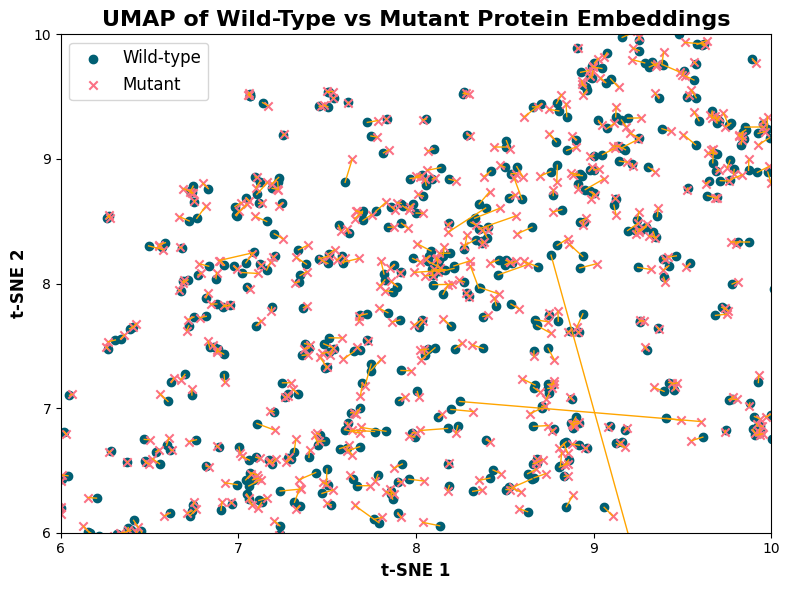

In [ ]:

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("UMAP of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(6, 10)
plt.ylim(6, 10)
plt.xticks(np.arange(6, 11, 1))
plt.yticks(np.arange(6, 11, 1))

plt.xlabel("UMAP 1", fontsize=12, fontweight='bold')
plt.ylabel("UMAP 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("../output/figure/2000_umap_zoomed_wt_mutant.tiff", dpi=300)
plt.close()
